In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/coursera-course-data/coursera_course_dataset_v3.csv
/kaggle/input/coursera-course-data/coursera_course_dataset_v2_no_null.csv


# Purpose of the Analysis 

In this case study, I delve into the dataset collected from [Coursera platform](http://www.coursera.org/). Coursera is an online learning platform founded in 2012 by Stanford professors Andrew Ng and Daphne Koller. It offers a wide range of courses, specializations, and degrees in various fields such as computer science, data science, business, humanities, and more. Coursera partners with universities and organizations worldwide to provide high-quality educational content, including video lectures, quizzes, assignments, and peer-reviewed assessments.

The purpose of this analysis is to uncover valuable insights and trends within their diverse range of courses. With this study, we can understand the landscape of educational offerings available on the platform, examining factors such as the distribution of courses across different organizations, the popularity of courses as indicated by reviews count and ratings, and the spectrum of skills offered. Through an exploratory analysis and visualization techniques, the goal is to provide actionable insights for learners and educators.

The document is organized as follows:

  * **A clear statement of the business**
  * **A description of the data sources.**
  * **Documentation of the data manipulation and cleaning step**
  * **The analysis with supporting visualizations and key findings.**
  * **Valuable insights and additional deliverables for further exploration.**

# Business Task

**Business Task:** Exploring Key Insights in Coursera Courses

By addressing the following questions, the goal is to uncover insights that can inform decision-making and strategy development for learners, educators, and platform administrators. I speacially focus on the data-related courses, helping learners identify high-quality resources in this domain. 

In the following, I list the guiding questions to be answered with the analysis:

1. What are the most popular organizations and course titles on the platform?
2. What are the couses with the most review counts?
3. What the top 10 skills overall courses?
4. What are the best rating Data Analysis courses?
5. What are the best rating Data Science courses?

# Data source and Data description

The data set entitled "Coursera Courses & Skills dataset 2024" is located at [Kaggle](https://www.kaggle.com/datasets/azraimohamad/coursera-course-data/data), where you can find the author's profile, the data card, the Metadata, and the License. 

The dataset contains 6 columns described as follows:

1. `Title`: Contains the course title.

2. `Organization`: The organization responsible for the course.

3. `Skills`: The list of skills can be obtained from the course.

4. `Ratings`: The average rating associated with each course, ranging from zero to five.

5. `Review count`: It counts the number of reviews received by a course.

6. `Metadata`: It contains information in regards the course level, course type, and expected training length.

# Preparing the data and cleaning steps

* Reading the file and preview:

In [2]:
df = pd.read_csv('/kaggle/input/coursera-course-data/coursera_course_dataset_v2_no_null.csv')

df.head(10)

,Unnamed: 0,Title,Organization,Skills,Ratings,Review counts,Metadata
0,0,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, ...",4.8,4.8(20K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
1,1,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business C...",4.8,4.8(137K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
2,2,Google Project Management:,Google,"Project Management, Strategy and Operations, ...",4.8,4.8(100K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
3,3,IBM Data Science,IBM,"Python Programming, Data Science, Machine Lea...",4.6,4.6(120K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
4,4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manag...",4.8,4.8(23K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
5,5,IBM Data Analyst,IBM,"Python Programming, Microsoft Excel, Data Vis...",4.6,4.6(73K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
6,6,Google IT Support,Google,"Computer Networking, Network Architecture, Ne...",4.8,4.8(183K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
7,7,Machine Learning,Multiple educators,"Machine Learning, Machine Learning Algorithms...",4.9,4.9(19K reviews),Beginner · Specialization · 1 - 3 Months
8,8,Google UX Design,Google,"User Experience, User Experience Design, User...",4.8,4.8(75K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
9,9,IBM DevOps and Software Engineering,IBM,"DevOps, Software Engineering, Cloud Computing...",4.6,4.6(44K reviews),Beginner · Professional Certificate · 3 - 6 Mo...


* Formatting column names to *snake_case* format

In [3]:
# Normalize column names to snake_case format
df.columns = df.columns.str.replace(' ', '_').str.replace(r'\W+', '_').str.lower()

# Print the normalized column names
print(df.columns)

Index(['unnamed:_0', 'title', 'organization', 'skills', 'ratings',
       'review_counts', 'metadata'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unnamed:_0     623 non-null    int64  
 1   title          623 non-null    object 
 2   organization   623 non-null    object 
 3   skills         623 non-null    object 
 4   ratings        623 non-null    float64
 5   review_counts  623 non-null    object 
 6   metadata       623 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 34.2+ KB


* The data set contains 622 rows

* The data set seems complete,  unbiased, original, comprehensive, and contains all the critical information needed to answer the business task.

* The data will remain unchanged from its initial collection to its analysis and reporting.

## Checking null values:

In [5]:
#checking for null values

df.isnull().any()

unnamed:_0       False
title            False
organization     False
skills           False
ratings          False
review_counts    False
metadata         False
dtype: bool

Great! The data set has no empty values.

## Verifying the number of duplicates:

In [6]:
#cheking for duplicates
num_duplicates = df[df.duplicated()].shape[0]

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


The data set has no duplicated rows.

## Transforming and creating new columns:

I have created two new columns. One to represent the reviews count excluding the extra information and changing its datatype, and another column to represent the course level extracted from the column Metadata.

In [7]:
# Extract the nummerical part representing the number of reviews from the column review_counts
r_count = df['review_counts'].str.split('(', expand = True)[1].str.rstrip('reviews)')

# Convert the number to float
def count_of_reviews(value):
    if 'K' in str(value):
        value = float(value.replace('K', '').replace('k', '')) * 1000
    return value

# Create a new column with the the new datatype corresponding to the numver of reviews
df['reviews'] = r_count.apply(count_of_reviews).astype(int)

# Create the column 'course level' from the column 'Metadata'
df['course_level'] = df['metadata'].str.split('·', expand = True)[0]

I have created a copy of the data frame having only the columns I have used for exploration. In the following I present the updated dataset and display the first five rows sortedy by reviews count.

In [8]:
# create a copy of the data frame having only the columns used for exploration

df_upd = pd.DataFrame()

df_upd['title'] = df['title']
df_upd['organization'] = df['organization']
df_upd['ratings'] = df['ratings']
df_upd['skills'] = df['skills']
df_upd['reviews'] = df['reviews']
df_upd['course_level'] = df['course_level']

df_upd = df_upd.sort_values(by='reviews', ascending=False)

df_upd.head(5)

,title,organization,ratings,skills,reviews,course_level
55,Python for Everybody,University of Michigan,4.8,"Computer Programming, Python Programming, Com...",269000,Beginner
180,Programming for Everybody (Getting Started wit...,University of Michigan,4.8,"Algorithms, Computational Thinking, Computer ...",225000,Beginner
6,Google IT Support,Google,4.8,"Computer Networking, Network Architecture, Ne...",183000,Beginner
65,Technical Support Fundamentals,Google,4.8,"Communication, Computer Architecture, Compute...",147000,Beginner
17,Deep Learning,DeepLearning.AI,4.8,"Machine Learning, Deep Learning, Artificial N...",142000,Intermediate


# Analysis and Visuals

I have created six visuals in order to answer the business questions, including a interactive scatter plot using the `plotly` library. 

## Which organizations have the highest number of courses and what are their average ratings?

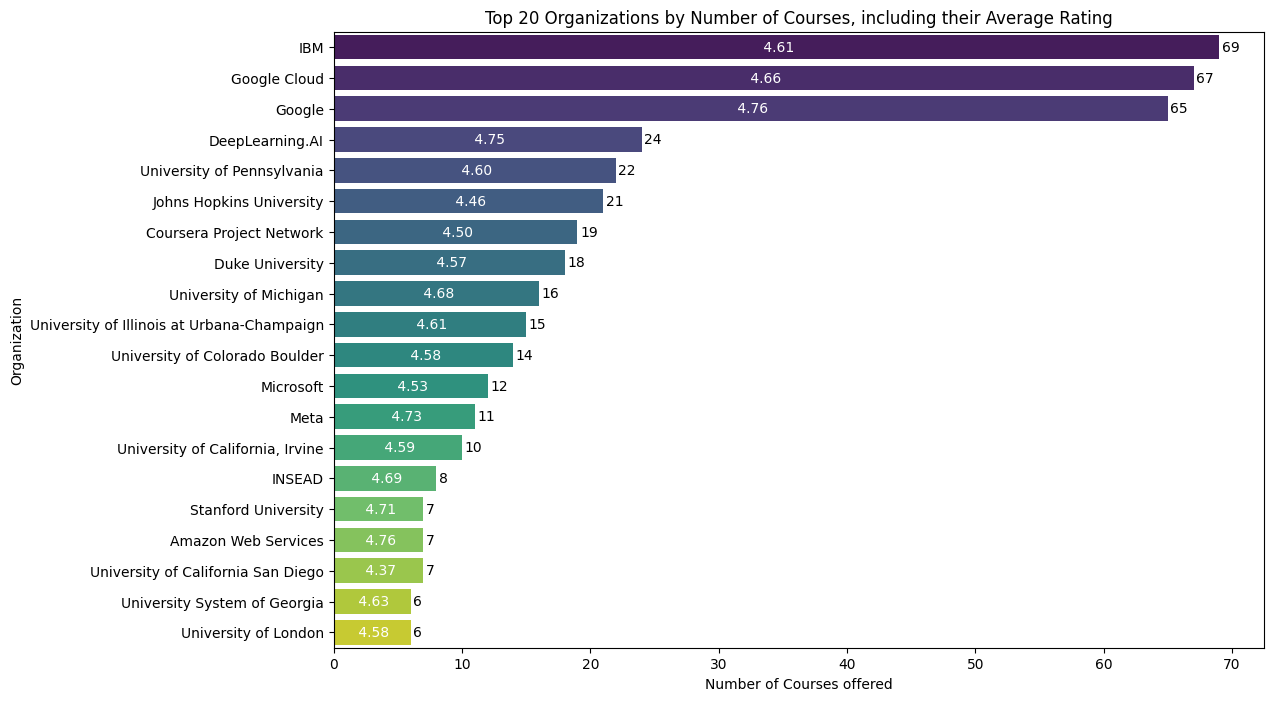

In [9]:
# Calculate the average rating for each organization
average_ratings = df_upd.groupby('organization')['ratings'].mean()

# Select the top 20 organizations based on number of courses
top_20_organizations = df_upd['organization'].value_counts().head(20)

# Plot the bar plot using Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_20_organizations.values, y=top_20_organizations.index, palette='viridis')

# Annotate each bar with its frequency
for i, v in enumerate(top_20_organizations.values):
    plt.text(v + 0.2, i, str(v), ha='left', va='center')

# Annotate each bar with its average rating
for i, (index, value) in enumerate(top_20_organizations.items()):
    avg_rating = average_ratings[index]
    plt.text(value / 2, i, f' {avg_rating:.2f}', ha='center', va='center', color='white')

plt.title('Top 20 Organizations by Number of Courses, including their Average Rating')
plt.xlabel('Number of Courses offered')
plt.ylabel('Organization')
plt.show()

Observations:

* IBM is the organization with the highest number of courses, offering 69 in tottal, followed by Google Cloud (67), and Goggle (65). If we consider Google Cloud and Google as a single company, it would a total of 132 courses. 

* The University of Pennsylvania is the Academic Institution with the highest number of courses provided on Coursera.

* The average rating varies between 4.5 and 4.7, which shows that organizations with the highest number of courses have a great rating.

## What are the courses with the righest number of reviews and what are their respective average ratings?

First, I present the top 20 courses ranked by reviews count and their respective average rating. Then, I show an interactive scatter plot where each datapoint represents a course. You can hover over a data point to display the course title, organization and experience level. 

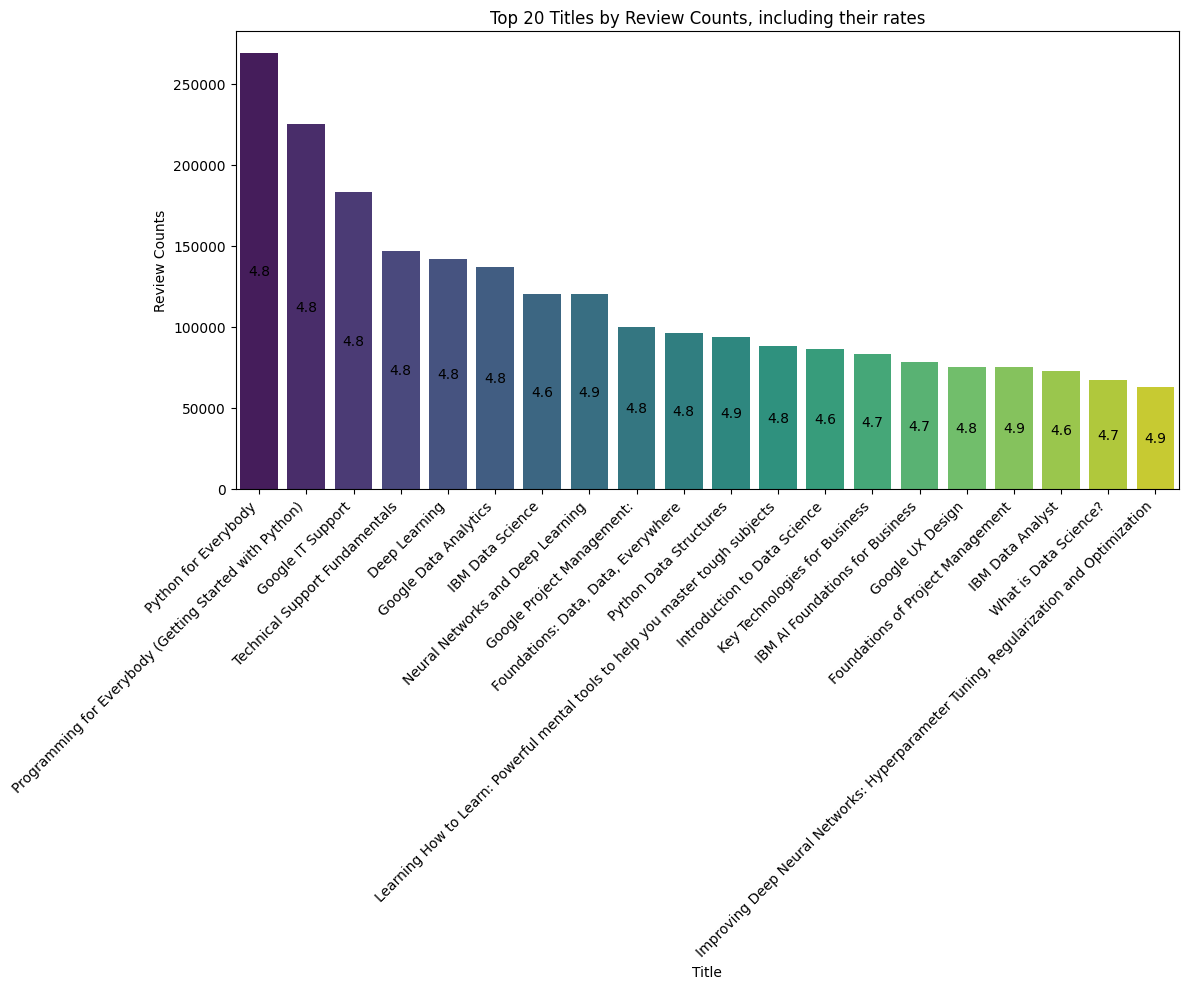

In [10]:
# Sort the DataFrame based on 'reviews_count' column in descending order
sorted_df = df_upd.sort_values(by='reviews', ascending=False)

# Select the top 20 titles
top_20_titles_df = sorted_df.head(20)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(data=top_20_titles_df, y='reviews', x='title', palette='viridis')

# Annotate each bar with its rating
ratings = top_20_titles_df['ratings']
for index, rating in enumerate(ratings):
    plt.text(index, top_20_titles_df.iloc[index]['reviews'] / 2, f'{rating}', ha='center', va='center')


plt.title('Top 20 Titles by Review Counts, including their rates')
plt.xlabel('Title')
plt.ylabel('Review Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Create an interactive scatter plot with Plotly
fig = px.scatter(df_upd, x='reviews', y='ratings', hover_data=['title', 'organization', 'course_level'])

# Customize the marker size, shape, and border line
fig.update_traces(
    marker=dict(
        size=12,  # Increase the size of the data points
        symbol='circle',  # Change the shape of the data points to a circle
        line=dict(
            color='purple',  # Set the color of the border line to black
            width=2  # Set the width of the border line
        ),
        color='rgba(0, 0, 0, 0)'  # Set the color of the marker to transparent

    )
)

# Customize the layout
fig.update_layout(
    title="Interactive Scatter Plot showing the courses Title and Organization by rating and reviews count",
    xaxis_title="Number of Reviews",
    yaxis_title="Ratings",
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="black"
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
    hoverlabel=dict(
        bgcolor="black",  # Set hover label background color to white
        font_size=14
    ),
    xaxis=dict(
        gridcolor='lightgrey'  # Add gridlines for better readability
    ),
    yaxis=dict(
        gridcolor='lightgrey'  # Add gridlines for better readability
    )
)

# Show the plot
fig.show()

Oberservations: 

* The course with the highest number of reviews is "Python for Everybody" from the "University of Michigan with 269k reviews with a rating of 4.8. The second one is "Programming for Everybody (Getting Start with Python)" also from the "University of Michigan" with 225k reviews with a rating of 4.8. The third most reviewed course is the "Google IT Support" from Google with 183k reviews with 4.8 as rating score.

* Overall, we can observe that most of the courses have less than 50k reviews. 

* Overall, the average rating is between 4.0 and 5.0, which shows that the courses have been well evaluated by their learners.


## Is there a correlation between average rating and reviews count?

In [12]:
# Calculate the correlation coefficient
correlation = df_upd['reviews'].corr(df_upd['ratings'])

# Print the correlation coefficient
print("Correlation coefficient between 'reviews' and 'ratings':", correlation)

# Interpret the correlation coefficient
if correlation > 0:
    print("There is a positive correlation between 'reviews' and 'ratings'.")
elif correlation < 0:
    print("There is a negative correlation between 'reviews' and 'ratings'.")
else:
    print("There is no linear correlation between 'reviews' and 'ratings'.")

Correlation coefficient between 'reviews' and 'ratings': 0.1641399786820173
There is a positive correlation between 'reviews' and 'ratings'.


The correlation between 'reviews' and 'ratings' is 0.16 which is considered a weak correlation.

# What the top 10 skills overall courses?

In this section, I have focused the analysis in regards to the skillset that each course offers. It is worth to recall that each course has a number of skills listed in their program. 

I have created a Word Cloud to display all the word skills, where the size of the word represents their frequency.

Leadership and Management    208
Data Analysis                191
Cloud Computing              150
Computer Programming         139
Python Programming           128
                            ... 
Geostatistics                  1
GIS Software                   1
Semantic Web                   1
ArcGIS                         1
Other Web Frameworks           1
Name: count, Length: 328, dtype: int64


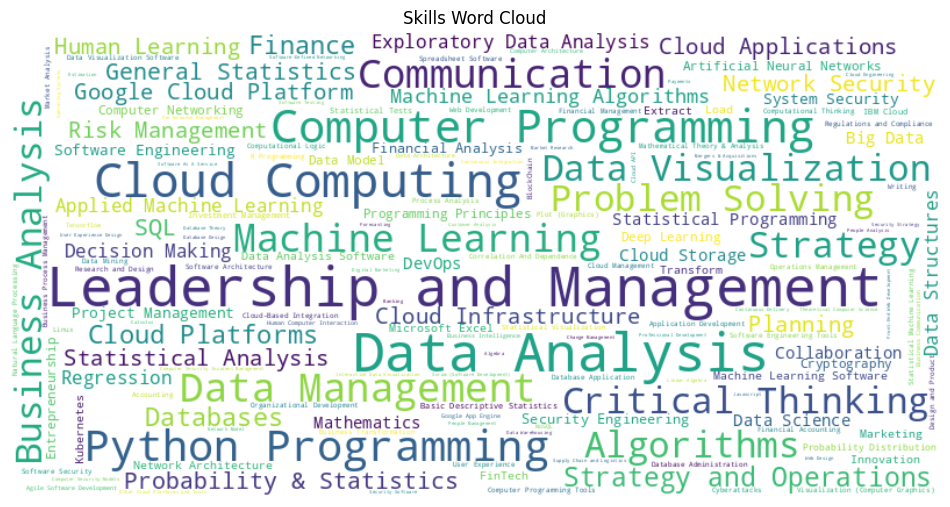

In [13]:
# Let's first extract all skills from the "Skills" column
all_skills = ','.join(df_upd['skills']).split(',')

# Count the frequency of each skill
skill_counts = pd.Series(all_skills).value_counts()

print(skill_counts)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Skills Word Cloud')
plt.axis('off')
plt.show()

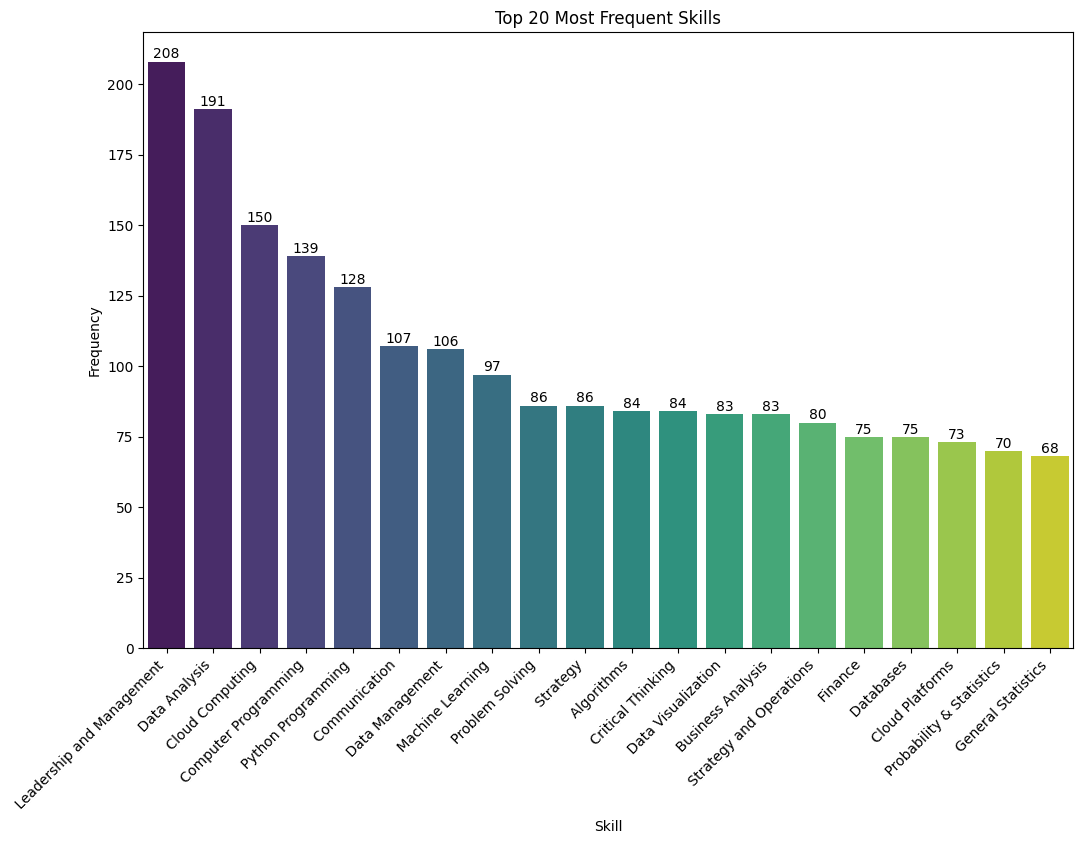

In [14]:
# Select the top 10 most frequent skills
top_10_skills = skill_counts.head(20)

# Plot the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_skills.index, y=top_10_skills.values, palette='viridis')
# Annotate each bar with its frequency
for i, v in enumerate(top_10_skills.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.title('Top 20 Most Frequent Skills')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Observation:

* It is very interesting to notice that skill the "Leadership and Management" is the most popular skill over all, offered in 208 courses. The second most popular skill is "Data Analysis", offered in 191 courses. The third skill in the list is "Cloud Computing" with 150, followed by "Python Programming" with 128.

* An unexpect overservation is that the skill "Data Analysis" appears much more often than "Data Science". 

# Course level distribution






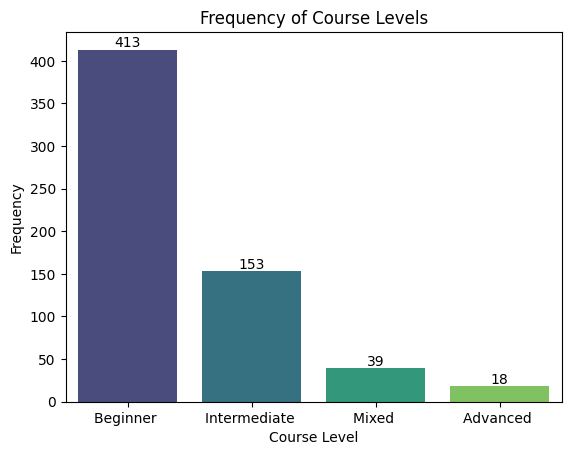

In [15]:
# Plotting the bar plot using Seaborn
ax = sns.countplot(data=df_upd, x='course_level', palette = 'viridis')

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

# Adding title and labels
plt.title('Frequency of Course Levels')
plt.xlabel('Course Level')
plt.ylabel('Frequency')

# Display the plot
plt.show()


We can notice that the number of courses for beginners is much greater than other experience levels, which shows that the platform invests in new careers for people who are starting a new area of knowledge.

# What are the most popular courses with both "Data Analysis" and "Python Programming" in the skillset?

In [16]:
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Filter the DataFrame to include only rows where 'skills' contain 'Data Analysis' and 'Python Programming'
filtered_df = df_upd[df_upd['skills'].str.contains('Data Analysis') & df['skills'].str.contains('Python Programming')]

# Select the desired columns
result_df = filtered_df[['title', 'organization', 'ratings', 'reviews', 'course_level']]

# Sort the result DataFrame by the 'reviews' column in descending order
result_df = result_df.sort_values(by='reviews', ascending=False)

# Reset the index to remove the old index
result_df = result_df.reset_index(drop=True)

# Display the result
result_df.head(20)

/tmp/ipykernel_18/621847430.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,title,organization,ratings,reviews,course_level
0,Python for Everybody,University of Michigan,4.8,269000,Beginner
1,Deep Learning,DeepLearning.AI,4.8,142000,Intermediate
2,IBM Data Science,IBM,4.6,120000,Beginner
3,Python Data Structures,University of Michigan,4.9,94000,Beginner
4,Introduction to Data Science,IBM,4.6,86000,Beginner
5,IBM Data Analyst,IBM,4.6,73000,Beginner
6,Data Science Fundamentals with Python and SQL,IBM,4.6,60000,Beginner
7,Applied Data Science,IBM,4.6,49000,Beginner
8,IBM Applied AI,IBM,4.6,47000,Beginner
9,IBM Data Engineering,IBM,4.6,47000,Beginner


# What are the most popular courses with both "Data Science" and "Python Programming" in the skillset?

In [17]:
# Reset the index of the DataFrame
df_upd.reset_index(drop=True, inplace=True)

# Filter the DataFrame to include only rows where 'skills' contain 'Data Science' and 'Python Programming'
filtered_df = df_upd[df_upd['skills'].str.contains('Data Science') & df['skills'].str.contains('Python Programming')]

# Select the desired columns
result_df = filtered_df[['title', 'organization', 'ratings', 'reviews', 'course_level']]

# Sort the result DataFrame by the 'reviews' column in descending order
result_df = result_df.sort_values(by='reviews', ascending=False)

# Reset the index to remove the old index
result_df = result_df.reset_index(drop=True)

# Display the result
result_df.head(20)

,title,organization,ratings,reviews,course_level
0,Google Data Analytics,Google,4.8,137000,Beginner
1,"Foundations: Data, Data, Everywhere",Google,4.8,96000,Beginner
2,Introduction to Data Science,IBM,4.6,86000,Beginner
3,Key Technologies for Business,IBM,4.7,83000,Beginner
4,IBM AI Foundations for Business,IBM,4.7,78000,Beginner
5,IBM Data Analyst,IBM,4.6,73000,Beginner
6,What is Data Science?,IBM,4.7,67000,Beginner
7,Applied Data Science,IBM,4.6,49000,Beginner
8,IBM Data Engineering,IBM,4.6,47000,Beginner
9,Data Engineering Foundations,IBM,4.6,46000,Beginner


# Key Insights:

IBM and Google offer the largest number of courses, with 69 and 132 courses respectively. The University of Pennsylvania and Johns Hopkins University are the most popular academic institutions in terms of the number of courses offered. All of these organizations have an excellent average rating ranging between 4.5 and 4.7.

The courses with the most reviews on Coursera are "Python for Everybody" (269,000 reviews) and "Programming for Everybody (Getting Started with Python)" (225,000 reviews), both offered by the University of Michigan. The other three courses in the top five are "Google IT Support", "Technical Support Fundamentals" and "Deep Learning".

The most frequently offered skills on Coursera are "Leadership and Management", "Data Analysis", "Cloud Computing", "Python Programming", "Data Management", and "Machine Learning". These skills are in high demand in the technology industry, particularly in data-related fields such as Data Analysis and Data Science. Python is the most popular programming language skill that individuals are seeking on Coursera. It is offered in 128 courses, which is 20% of the total number of courses (623).

# Recommendations 

If someone is trying to decide which course to study next, they should consider a few factors. Firstly, they should look at their skills in the related field, the popularity of the course based on its number of reviews, and the course level. While the average rating is also important, it has less impact than the number of reviews.

"If someone is interested in pursuing a new area of study, Data Analysis is an enticing field with a variety of courses available, such as the "Google Data Analytics" program. When selecting a course, it is also worth considering Python, one of the most widely used programming languages."

# Limitations

"I have noticed some discrepancies in the data set. Specifically, the course "Google Data Analytics" does not include "Data Science" and "Python" in its skill set as mentioned in the data set. To confirm, I visited the Coursera website and found that the skill set listed in the data set is different from the one on the website. Therefore, it is necessary to carry out further investigation to verify the integrity of the data and to understand how it was collected."
